In [4]:
import os
import os
from PIL import Image, ImageEnhance
import random
import shutil
import random
from collections import defaultdict
import os
import random
from PIL import Image, ImageEnhance, ImageOps, ImageFilter
import os
import random
from PIL import Image, ImageEnhance, ImageFilter, ImageOps
import os
import shutil
import random
from collections import defaultdict
import matplotlib.pyplot as plt


- Traverse through each subfolder in the root directory.
- Count the number of images in each subfolder.
- Determine the minimum number of images among all the subfolders.
- Calculate the number of images to allocate for each category (train, val, test) based on the minimum count and the desired distribution.
- Create new folders (train, val, test) if they don't exist already.
- Copy the required number of images from each subfolder to the respective category folders, maintaining the desired distribution.

In [12]:
# Howto:
# https://medium.com/@siromermer/pipeline-for-every-pytorch-image-classification-problem-creating-dataset-f0f57d6ae225

In [27]:
# path to train and validation sets
train_dir= "../Downloading_images/data/train/" # path to the train folder
val_dir= "../Downloading_images/data/val" # path to the validation folder
test_dir= "../Downloading_images/data/test" # path to the test folder

In [28]:
root_dir = '../Downloading_images/data/'

In [46]:
# Import the necessary libraries
import os
import random
from PIL import Image

# Ensure the existence of train, val, and test directories
for directory in [train_dir, val_dir, test_dir]:
    os.makedirs(directory, exist_ok=True)

# Get list of class IDs (subdirectory names), excluding 'websites'
class_ids = [name for name in os.listdir(root_dir) if os.path.isdir(os.path.join(root_dir, name)) and name != 'websites']

# Define counts for train, val, and test
train_count = 600
val_count = 150
test_count = 150

# Iterate over each class directory
for class_id in class_ids:
    class_dir = os.path.join(root_dir, class_id)
    
    # List all images in the class directory
    images = os.listdir(class_dir)
    
    # Shuffle the images to distribute randomly
    random.shuffle(images)
    
    # Initialize counts for train, val, and test directories
    train_images = 0
    val_images = 0
    test_images = 0
    
    # Distribute images into train, val, and test directories
    for image_name in images:
        src = os.path.join(class_dir, image_name)
        
        # Randomly select the destination directory based on the distribution
        if train_images < train_count:
            dst_dir = train_dir
            train_images += 1
        elif val_images < val_count:
            dst_dir = val_dir
            val_images += 1
        elif test_images < test_count:  # Check if the test count has been reached
            dst_dir = test_dir
            test_images += 1
        else:
            break  # Stop adding images to the test directory once the count is reached
        
        # Create the corresponding subfolder in the destination directory if it doesn't exist
        dst_class_dir = os.path.join(dst_dir, class_id)
        os.makedirs(dst_class_dir, exist_ok=True)
        
        # Construct the output path for saving the image
        output_path = os.path.join(dst_class_dir, image_name)
        
        # Open the image using PIL
        with Image.open(src) as image:
            # Convert the image to RGB mode if it's in RGBA mode
            if image.mode == "RGBA":
                image = image.convert("RGB")
            
            # Save the image to the destination directory while preserving the subfolder structure
            image.save(output_path)

    # Print the count of images added from each class into each category
    print(f"Class {class_id}: Train - {train_images}, Val - {val_images}, Test - {test_images}")

print("Images distributed successfully.")


Class 130228: Train - 600, Val - 150, Test - 150
Class 47892: Train - 600, Val - 150, Test - 150
Class 48537: Train - 600, Val - 150, Test - 150
Class 48681: Train - 600, Val - 150, Test - 150
Class 593040: Train - 600, Val - 150, Test - 150
Class 59549: Train - 600, Val - 150, Test - 150
Class 83653: Train - 600, Val - 150, Test - 150
Class 914922: Train - 600, Val - 150, Test - 150


PermissionError: [Errno 13] Permission denied: '../Downloading_images/data/test\\83653'

In [6]:
test_dir = os.path.join(root_dir, 'test')

class_weights = {
    47892: 0.125,   # Impatiens glandulifera
    130228: 0.125,  # Heracleum mantegazzianum
    914922: 0.125,  # Reynoutria japonica
    59549: 0.125,   # Lupinus polyphyllus
    48537: 0.125,   # Lysichiton americanus
    83653: 0.125,   # Rosa rugosa
    593040: 0.125,   # Reynoutria sachalinensis
    48681: 0.125    # Spiraea
}

total_weight = sum(class_weights.values())

# Calculate the test count for each class based on the weights
test_counts_by_class = {int(class_id): round(min_count * class_weights[int(class_id)] / total_weight) for class_id in class_ids}

# Distribute test data based on weights
for class_id, test_count in test_counts_by_class.items():
    class_dir = os.path.join(root_dir, str(class_id))  # Convert class_id to string
    images = os.listdir(class_dir)
    random.shuffle(images)
    test_images = 0
    for image in images:
        src = os.path.join(class_dir, image)
        dst_class_dir = os.path.join(test_dir, str(class_id))
        os.makedirs(dst_class_dir, exist_ok=True)
        dst = os.path.join(dst_class_dir, image)
        shutil.copy(src, dst)
        test_images += 1
        if test_images >= test_count:
            break

    print(f"Class {class_id}: Test - {test_images}")

Class 130228: Test - 850
Class 47892: Test - 850
Class 48537: Test - 850
Class 48681: Test - 850
Class 593040: Test - 850
Class 59549: Test - 850
Class 83653: Test - 850
Class 914922: Test - 850


In [17]:
''' all subfolder same amount

root_dir = '../Downloading_images/data/'
train_dir = os.path.join(root_dir, 'train')
val_dir = os.path.join(root_dir, 'val')
test_dir = os.path.join(root_dir, 'test')

# Ensure the existence of train, val, and test directories
for directory in [train_dir, val_dir, test_dir]:
    os.makedirs(directory, exist_ok=True)

# Count images in each class
class_counts = defaultdict(int)
for subdir, _, files in os.walk(root_dir):
    if "websites" not in subdir:  # Exclude the "websites" folder
        if files:  # Only process directories with files (images)
            class_id = os.path.basename(subdir)
            class_counts[class_id] += len(files)

# Determine the minimum count
min_count = min(class_counts.values())

# Extract class IDs from class_counts dictionary
class_ids = list(class_counts.keys())

# Define distribution percentages based on the minimum count
train_percent = 0.7
val_percent = 0.15
test_percent = 0.15

# Calculate the rounded distribution counts to balance test and val directories
val_count = round(min_count * val_percent)
test_count = round(min_count * test_percent)

# Adjust train count to ensure the sum of train, val, and test counts is equal to min_count
train_count = min_count - val_count - test_count

print(f" val_count = {val_count}, train_count = {train_count}, test_count = {test_count } ") 

# Iterate over each class directory
for class_id in class_ids:
    class_dir = os.path.join(root_dir, class_id)
    
    # List all images in the class directory
    images = os.listdir(class_dir)
    
    # Shuffle the images to distribute randomly
    random.shuffle(images)
    
    # Initialize counts for train, val, and test directories
    train_images = 0
    val_images = 0
    test_images = 0
    
    # Distribute images into train, val, and test directories
    for image in images:
        src = os.path.join(class_dir, image)
        
        # Randomly select the destination directory based on the distribution
        if train_images < train_count:
            dst_dir = train_dir
            train_images += 1
        elif val_images < val_count:
            dst_dir = val_dir
            val_images += 1
        elif test_images < test_count:  # Check if the test count has been reached
            dst_dir = test_dir
            test_images += 1
        else:
            break  # Stop adding images to the test directory once the count is reached
        
        # Create the corresponding subfolder in the destination directory if it doesn't exist
        dst_class_dir = os.path.join(dst_dir, class_id)
        os.makedirs(dst_class_dir, exist_ok=True)
        
        # Copy the image to the destination directory while preserving the subfolder structure
        dst = os.path.join(dst_class_dir, image)
        shutil.copy(src, dst)

    # Print the count of images added from each class into each category
    print(f"Class {class_id}: Train - {train_images}, Val - {val_images}, Test - {test_images}")

print("Images distributed successfully.")
'''

' all subfolder same amount\n\nroot_dir = \'../Downloading_images/data/\'\ntrain_dir = os.path.join(root_dir, \'train\')\nval_dir = os.path.join(root_dir, \'val\')\ntest_dir = os.path.join(root_dir, \'test\')\n\n# Ensure the existence of train, val, and test directories\nfor directory in [train_dir, val_dir, test_dir]:\n    os.makedirs(directory, exist_ok=True)\n\n# Count images in each class\nclass_counts = defaultdict(int)\nfor subdir, _, files in os.walk(root_dir):\n    if "websites" not in subdir:  # Exclude the "websites" folder\n        if files:  # Only process directories with files (images)\n            class_id = os.path.basename(subdir)\n            class_counts[class_id] += len(files)\n\n# Determine the minimum count\nmin_count = min(class_counts.values())\n\n# Extract class IDs from class_counts dictionary\nclass_ids = list(class_counts.keys())\n\n# Define distribution percentages based on the minimum count\ntrain_percent = 0.7\nval_percent = 0.15\ntest_percent = 0.15\n\n#

In [47]:
# Function to count the total number of images in a directory
def count_images_in_directory(directory):
    total_images = 0
    for subdir, _, files in os.walk(directory):
        # Exclude the root directory itself
        if subdir != directory:
            total_images += len(files)
    return total_images

# Calculate total count of images in train, val, and test folders
total_train_images = count_images_in_directory(train_dir)
total_val_images = count_images_in_directory(validation_dir)
total_test_images = count_images_in_directory(test_dir)

# Print the counts
print("Total number of images in train directory:", total_train_images)
print("Total number of images in val directory:", total_val_images)
print("Total number of images in test directory:", total_test_images)


Total number of images in train directory: 4800
Total number of images in val directory: 1200
Total number of images in test directory: 1200


# Making more images through transformations

In [51]:
def transform_images(input_dir, output_dir):
    for subdir, _, files in os.walk(input_dir):
        for filename in files:
            if filename.endswith(('.jpg', '.jpeg', '.png')):
                img_path = os.path.join(subdir, filename)
                try:
                    image = Image.open(img_path)
                except (IOError, OSError) as e:
                    print(f"Skipping {filename} due to error: {e}")
                    continue
                
                # Apply different transformations to the original image
                # Transformation 1: Resizing and Cropping
                transformed_image = ImageOps.fit(image, (224, 224))
                save_image(transformed_image, subdir, output_dir, filename, input_dir, suffix='_resize_crop')

                # Transformation 2: Flips
                transformed_image = image.transpose(Image.FLIP_LEFT_RIGHT)
                save_image(transformed_image, subdir, output_dir, filename, input_dir, suffix='_flip_lr')

                # Transformation 3: Color Jittering
                brightness_factor = random.uniform(0.8, 1.2)
                contrast_factor = random.uniform(0.8, 1.2)
                saturation_factor = random.uniform(0.8, 1.2)
                hue_factor = random.uniform(-0.1, 0.1)
                transformed_image = ImageEnhance.Brightness(image).enhance(brightness_factor)
                transformed_image = ImageEnhance.Contrast(transformed_image).enhance(contrast_factor)
                transformed_image = ImageEnhance.Color(transformed_image).enhance(saturation_factor)
                transformed_image = transformed_image.convert('HSV')
                transformed_image = ImageEnhance.Color(transformed_image).enhance(1 + hue_factor)
                transformed_image = transformed_image.convert('RGB')
                save_image(transformed_image, subdir, output_dir, filename, input_dir, suffix='_color_jitter')

                # Transformation 4: Gaussian Blur
                blur_radius = random.randint(0, 2)
                transformed_image = image.filter(ImageFilter.GaussianBlur(radius=blur_radius))
                save_image(transformed_image, subdir, output_dir, filename, input_dir, suffix='_gaussian_blur')

                # Transformation 5: Brightness and Contrast Adjustment
                brightness_factor = random.uniform(0.8, 1.2)
                contrast_factor = random.uniform(0.8, 1.2)
                transformed_image = ImageEnhance.Brightness(image).enhance(brightness_factor)
                transformed_image = ImageEnhance.Contrast(transformed_image).enhance(contrast_factor)
                save_image(transformed_image, subdir, output_dir, filename, input_dir, suffix='_brightness_contrast')

                # Transformation 6: Random Rotation, Scaling, and Translation
                scale_factor = random.uniform(0.8, 1.2)
                rotation_angle = random.randint(-10, 10)
                translate_x = random.randint(-10, 10)
                translate_y = random.randint(-10, 10)
                transformed_image = image.rotate(rotation_angle, resample=Image.BICUBIC)
                transformed_image = transformed_image.resize((int(image.width * scale_factor), int(image.height * scale_factor)), resample=Image.BICUBIC)
                transformed_image = transformed_image.transform(transformed_image.size, Image.AFFINE, (1, 0, translate_x, 0, 1, translate_y))
                save_image(transformed_image, subdir, output_dir, filename, input_dir, suffix='_rotation_scaling')

    print("Transformations applied successfully.")

def save_image(image, subdir, output_dir, filename, input_dir, suffix=''):
    new_filename = os.path.splitext(filename)[0] + suffix + os.path.splitext(filename)[1]
    output_subdir = os.path.relpath(subdir, input_dir)
    output_subdir_path = os.path.join(output_dir, output_subdir)
    os.makedirs(output_subdir_path, exist_ok=True)
    output_path = os.path.join(output_subdir_path, new_filename)
    
    # Convert image to RGB mode if it's RGBA
    if image.mode == 'RGBA':
        image = image.convert('RGB')
    
    # Save the image
    image.save(output_path)

# Define input and output directories
train_input_dir = '../Downloading_images/data/train'
val_input_dir = '../Downloading_images/data/val'
# test_input_dir = '../Downloading_images/data/test'

train_output_dir = '../Downloading_images/data/train'
val_output_dir = '../Downloading_images/data/val'
# test_output_dir = '../Downloading_images/data/test'

# Apply transformations to train images
transform_images(train_input_dir, train_output_dir)
print("Train transformations applied successfully.")

# Apply transformations to validation images
transform_images(val_input_dir, val_output_dir)
print("Val transformations applied successfully.")

# Apply transformations to test images
# transform_images(test_input_dir, test_output_dir)
# print("Test transformations applied successfully.")

Transformations applied successfully.
Train transformations applied successfully.
Transformations applied successfully.
Val transformations applied successfully.


## Print images to check transformation

In [52]:
def print_original_and_transformed(input_dir):
    # List all subdirectories (taxon ids) in the input directory
    subdirectories = [d for d in os.listdir(input_dir) if os.path.isdir(os.path.join(input_dir, d))]
    
    # Randomly select a subdirectory
    selected_subdirectory = random.choice(subdirectories)
    
    # Choose a random image from the selected subdirectory
    subdirectory_path = os.path.join(input_dir, selected_subdirectory)
    filename = random.choice(os.listdir(subdirectory_path))
    
    # Construct paths for the original and transformed images
    original_img_path = os.path.join(subdirectory_path, filename)
    transformed_filename = filename.split('.')[0] + '_t.' + filename.split('.')[1]
    transformed_img_path = os.path.join(subdirectory_path, transformed_filename)
    
    # Load and display the original image
    original_image = Image.open(original_img_path)
    print(f"Original Image: {original_img_path}")
    display(original_image.resize((200, 200)))
    
    # Check if the transformed image exists before loading and displaying it
    if os.path.exists(transformed_img_path):
        transformed_image = Image.open(transformed_img_path)
        print(f"Transformed Image: {transformed_img_path}")
        display(transformed_image.resize((200, 200)))
    else:
        print("Transformed Image not found.")

In [53]:
def count_images_in_directory(directory):
    count = 0
    for root, _, files in os.walk(directory):
        for filename in files:
            if filename.endswith(('.jpg', '.jpeg', '.png')):
                count += 1
    return count

# Define input directories
train_input_dir = '../Downloading_images/data/train'
val_input_dir = '../Downloading_images/data/val'
test_input_dir = '../Downloading_images/data/test'

# Count the total number of images in train, val, and test directories
total_train_images = count_images_in_directory(train_input_dir)
total_val_images = count_images_in_directory(val_input_dir)
total_test_images = count_images_in_directory(test_input_dir)

print("Total number of images in train directory:", total_train_images)
print("Total number of images in val directory:", total_val_images)
print("Total number of images in test directory:", total_test_images)


Total number of images in train directory: 33600
Total number of images in val directory: 8400
Total number of images in test directory: 8400


Original Image: ../Downloading_images/data/train\130228\330954400_flip_lr.jpg


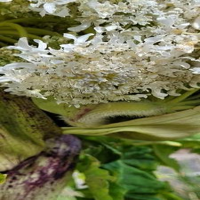

Transformed Image not found.


In [54]:
print_original_and_transformed(train_input_dir)

In [55]:
# calculate distributions in train set and save them to dictionary
train_class_counts = {}
for class_folder in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_folder)
    if os.path.isdir(class_path):
        num_images = len(os.listdir(class_path))
        train_class_counts[class_folder] = num_images

# calculate distributions in validation set and save them to dictionary
validation_class_counts = {}
for class_folder in os.listdir(val_dir):
    class_path = os.path.join(val_dir, class_folder)
    if os.path.isdir(class_path):
        num_images = len(os.listdir(class_path))
        validation_class_counts[class_folder] = num_images

# calculate distributions in test set and save them to dictionary
test_class_counts = {}
for class_folder in os.listdir(test_dir):
    class_path = os.path.join(test_dir, class_folder)
    if os.path.isdir(class_path):
        num_images = len(os.listdir(class_path))
        test_class_counts[class_folder] = num_images

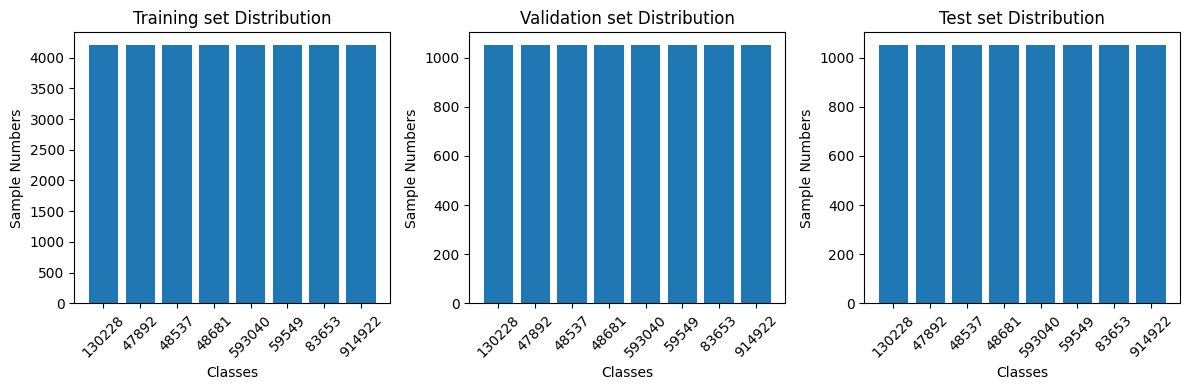

In [56]:
plt.figure(figsize=(12, 4))

# plot for train set
plt.subplot(1, 3, 1)
plt.bar(train_class_counts.keys(), train_class_counts.values())
plt.title('Training set Distribution')
plt.xlabel('Classes')
plt.ylabel('Sample Numbers')
plt.xticks(rotation=45)

# plot for validation set
plt.subplot(1, 3, 2)
plt.bar(validation_class_counts.keys(), validation_class_counts.values())
plt.title('Validation set Distribution')
plt.xlabel('Classes')
plt.ylabel('Sample Numbers')
plt.xticks(rotation=45)

# plot for test set
plt.subplot(1, 3, 3)
plt.bar(test_class_counts.keys(), test_class_counts.values())
plt.title('Test set Distribution')
plt.xlabel('Classes')
plt.ylabel('Sample Numbers')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()